In [72]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from python_functions import find_best_model, plot_train_test_metrics, eval_metrics
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Training the Model

First, train a linear regression model that takes two hyperparameters: alpha and l1_ratio.

This example uses the familiar pandas, numpy, and sklearn APIs to create a simple machine learning model.

You can run the example through the .py script using the following command.
* python train.py \<alpha\> \<l1_ratio\>

Or you can also use the notebook code below that does the same thing

In [73]:
# Wine Quality Sample

def train(in_alpha, in_l1_ratio):

    np.random.seed(40)

    # Read the wine-quality csv file from the URL
    csv_url =\
        'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
    data = pd.read_csv(csv_url, sep=';')

    # Split the data into training and test sets. (0.75, 0.25) split.
    train, test = train_test_split(data)

    # The predicted column is "quality" which is a scalar from [3, 9]
    train_x = train.drop(["quality"], axis=1)
    test_x = test.drop(["quality"], axis=1)
    train_y = train[["quality"]]
    test_y = test[["quality"]]

    # Set default values if no alpha is provided
    if float(in_alpha) is None:
        alpha = 0.5
    else:
        alpha = float(in_alpha)

    # Set default values if no l1_ratio is provided
    if float(in_l1_ratio) is None:
        l1_ratio = 0.5
    else:
        l1_ratio = float(in_l1_ratio)

    # Execute ElasticNet
    lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    lr.fit(train_x, train_y)

    # Evaluate Metrics
    predicted_qualities = lr.predict(test_x)
    (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

    return rmse, mae, r2

In [74]:
# Run the above training code with different hyperparameters (9 runs)
result_dict = {
    'alpha': [],
    'l1': [],
    'RMSE': [],
    'MAE': [],
    'R2': []
}

alphas = [0.25, 0.5, 0.75]
l1_ratios = [0.25, 0.5, 0.75]
for i in alphas:
    for j in l1_ratios:
        result_dict['alpha'].append(i)
        result_dict['l1'].append(j)
        rmse, mae, r2 = train(i,j)
        result_dict['RMSE'].append(rmse)
        result_dict['MAE'].append(mae)
        result_dict['R2'].append(r2)
        
result_df = pd.DataFrame(result_dict)
result_df

,alpha,l1,RMSE,MAE,R2
0,0.25,0.25,0.738049,0.569031,0.228201
1,0.25,0.50,0.748931,0.580695,0.205275
2,0.25,0.75,0.766248,0.598598,0.168098
3,0.50,0.25,0.759655,0.591313,0.182351
4,0.50,0.50,0.793164,0.627195,0.108626
5,0.50,0.75,0.831866,0.665104,0.019517
6,0.75,0.25,0.783731,0.616547,0.129703
7,0.75,0.50,0.831870,0.665129,0.019506
8,0.75,0.75,0.833180,0.669235,0.016416


## Choose the Best Performing Model From Above

In [75]:
# Find the best model, then print train and test metrics
alpha, l1_ratio = find_best_model(result_df, 'RMSE')

np.random.seed(40)

# Read the wine-quality csv file from the URL
csv_url =\
    'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(csv_url, sep=';')

# Split the data into training and test sets. (0.75, 0.25) split.
train, test = train_test_split(data)

# The predicted column is "quality" which is a scalar from [3, 9]
train_x = train.drop(["quality"], axis=1)
test_x = test.drop(["quality"], axis=1)
train_y = train[["quality"]]
test_y = test[["quality"]]

# Execute ElasticNet
lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
lr.fit(train_x, train_y)

# Evaluate Metrics
train_predictions = lr.predict(train_x)
test_predictions = lr.predict(test_x)
(rmse_train, mae_train, r2_train) = eval_metrics(train_y, train_predictions)
(rmse_test, mae_test, r2_test) = eval_metrics(test_y, test_predictions)

# Print out metrics
print("  Train RMSE: %s" % rmse_train)
print("  Train MAE: %s" % mae_train)
print("  Train R2: %s" % r2_train)
print("  Test RMSE: %s" % rmse_test)
print("  Test MAE: %s" % mae_test)
print("  Test R2: %s" % r2_test)

  Train RMSE: 0.6933433867004593
  Train MAE: 0.5491631400810368
  Train R2: 0.24016877327069863
  Test RMSE: 0.7380489682487518
  Test MAE: 0.5690312554727687
  Test R2: 0.22820122626467798


## Plot Visualization of Best Performing Model

dataset      test     train
metric                     
mae      0.569031  0.549163
r2       0.228201  0.240169
rmse     0.738049  0.693343


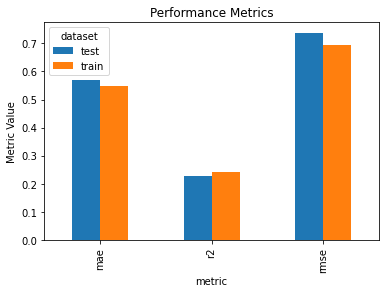

In [76]:
df = plot_train_test_metrics(rmse_train, mae_train, r2_train, rmse_test, mae_test, r2_test)
print(df)